In [1]:
%matplotlib widget
%load_ext autoreload
%autoreload 2

ModuleNotFoundError: No module named 'matplotlib'

In [2]:
import tifffile as tf
import os
import numpy as np
import scipy
import torch
from matplotlib import pyplot as plt
from neurom.io.utils import load_morphology
from neurom import viewer

# from dipy.core.sphere import disperse_charges, Sphere, HemiSphere
# from fury import actor, window
# from IPython.core.display import Image

import sys
sys.path.append('../../')
from image import Image


In [3]:
CF1 = '/home/brysongray/tractography/data/Cerebellar Climbing Fibers/Image Stacks/CF_1'
CF1_label = '/home/brysongray/tractography/data/Cerebellar Climbing Fibers/Gold Standard Reconstructions/CF_1.swc'

# load image stack
cf1_files = os.listdir(CF1)
cf1_stack = []
for i in range(len(cf1_files)):
    cf1_stack.append(tf.imread(os.path.join(CF1,cf1_files[i])))
cf1_stack = np.array(cf1_stack)
print(f'stack shape: {cf1_stack.shape}')

# load gold standard
label = load_morphology(CF1_label)

stack shape: (34, 4343, 6120, 3)



/home/brysongray/tractography/data/Cerebellar Climbing Fibers/Gold Standard Reconstructions/CF_1.swc:1506:warning

/home/brysongray/tractography/data/Cerebellar Climbing Fibers/Gold Standard Reconstructions/CF_1.swc:1493:warning

/home/brysongray/tractography/data/Cerebellar Climbing Fibers/Gold Standard Reconstructions/CF_1.swc:1322:warning

/home/brysongray/tractography/data/Cerebellar Climbing Fibers/Gold Standard Reconstructions/CF_1.swc:1216:warning

/home/brysongray/tractography/data/Cerebellar Climbing Fibers/Gold Standard Reconstructions/CF_1.swc:1118:warning

/home/brysongray/tractography/data/Cerebellar Climbing Fibers/Gold Standard Reconstructions/CF_1.swc:0:warning


In [ ]:
label.sections[1].points[:3]

In [4]:
segments = []
for i in range(len(label.sections)):
    points = label.sections[i].points
    # points = np.stack((points[:,2], points[:,1]//10, ))
    starts = []
    ends = []
    for ii in range(len(points)-1):
        if np.all(points[ii,:3] == points[ii+1,:3]):
            continue
        else:
            starts.append(points[ii])
            ends.append(points[ii+1])
    segments_ = np.stack((starts, ends), axis=1)
    r = (segments_[:,0,-1]+segments_[:,1,-1])/2
    segments_[:,:,-1] = np.stack((r,r), axis=-1)
    segments.append(segments_)
segments = np.concatenate(segments, axis=0)
print(f'segments shape: {segments.shape}')


segments shape: (1925, 2, 4)


In [5]:
# downsample points
segments = np.stack((segments[:,:,2], segments[:,:,1]/10, segments[:,:,0]/10, segments[...,-1]), axis=-1)

In [ ]:
segments[-5:]

In [6]:
I = torch.zeros((1, cf1_stack.shape[0], cf1_stack.shape[1]//10, cf1_stack.shape[2]//10))
dx = [0.88, 1., 1.]
I = Image(I, dx)

In [ ]:
I.data.shape

In [7]:
for s in segments:
    s = torch.Tensor(s)
    I.draw_line_segment(s[:,:3], width=s[0,-1].item(), binary=False)

In [8]:
cf1_toshow = cf1_stack[:,::10,::10].min(axis=0)

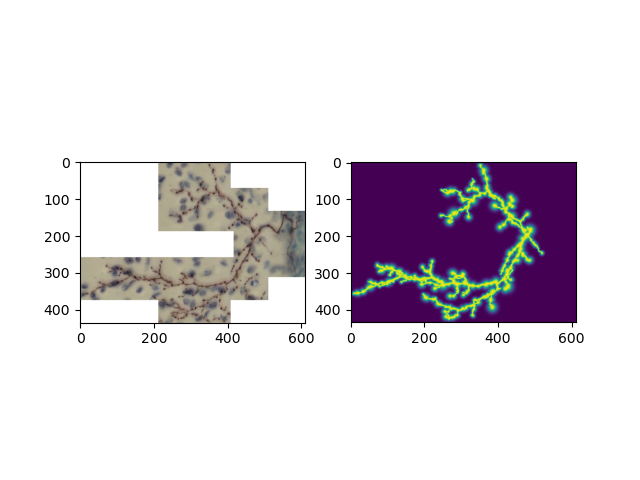

In [10]:
fig, ax = plt.subplots(1,2)
ax[0].imshow(cf1_toshow)
ax[1].imshow(I.data[0].amax(dim=0))

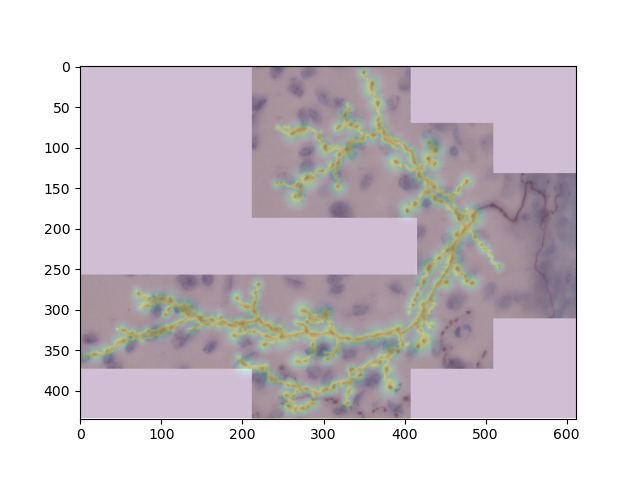

In [9]:
plt.figure()
plt.imshow(I.data[0].amax(dim=0), alpha=0.5)
plt.imshow(cf1_toshow, alpha=0.5)

In [ ]:
points = label.points[:,:3].astype(int)
points = np.stack((points[:,2], points[:,1]//10, points[:,0]//10))
print(points.shape)

In [ ]:
density = np.zeros((cf1_stack.shape[0],cf1_stack.shape[1]//10, cf1_stack.shape[2]//10))
density[*points] = 1.0
density = scipy.ndimage.gaussian_filter(density, sigma=2)
density = density / density.max()
mask = np.zeros_like(density)
mask[density>0.04] = 1.0

In [ ]:
i = 19
img = cf1_stack[i, ::10, ::10]
plt.figure()
plt.imshow(img)
plt.figure()
plt.imshow(density[i])
plt.figure()
plt.imshow(mask[i])


In [ ]:
np.savez('/home/brysongray/tractography/data/cerebellar_climbing_fibers_cf1_test',density=density,mask=mask, seed=(19,180,488), dx=(0.88,1.0,1.0))

In [ ]:
I = torch.zeros((1,10,10,10))
dx = [1.,1.,1.]

I = Image(I, dx)


In [ ]:
plt.figure()
plt.imshow(I.data[0,4])
segment = torch.Tensor([[4,2,4], [4,6,4]])
I.draw_line_segment(segment, 5)
plt.figure()
plt.imshow(I.data[0,4])


In [ ]:
plt.close('all')

In [ ]:
np.exp(-1)

In [2]:
import torch
import numpy as np

actions = np.array([[0.0, 0.0, 1.0],
                        [0.0, 0.0, -1.0],
                        [0.0, 1.0, 0.0],
                        [0.0, -1.0, 0.0],
                        [1.0, 0.0, 0.0],
                        [-1.0, 0.0, 0.0],
                        [0.0, 0.0, 0.0]])

In [4]:
np.save('/home/brysongray/tractography/neuron_trx/action_space_6_dir.npy',actions)